param_num: 104450
[0, 1.4286524454752605, 2.857304890950521, 4.285957336425781, 5.714609781901042, 7.143262227376303, 8.571914672851562, 10.000567118326822, 11.429219563802082, 12.857872009277342, 14.286524454752602, 15.715176900227862, 17.14382934570312, 18.572481791178383, 20.001134236653645, 21.429786682128906, 22.858439127604168, 24.28709157307943, 25.71574401855469, 27.144396464029953, 28.573048909505214, 30.001701354980476, 31.430353800455737, 32.859006245931, 34.28765869140626, 35.716311136881515, 37.14496358235677, 38.57361602783203, 40.00226847330729, 41.43092091878255, 42.859573364257805, 44.28822580973306, 45.71687825520832, 47.14553070068358, 48.57418314615884, 50.002835591634096, 51.431488037109354, 52.86014048258461, 54.28879292805987, 55.71744537353513, 57.146097819010386, 58.574750264485644, 60.0034027099609, 61.43205515543616, 62.86070760091142, 64.28936004638668, 65.71801249186194, 67.1466649373372, 68.57531738281247, 70.00396982828774, 71.432622273763, 72.86127471923

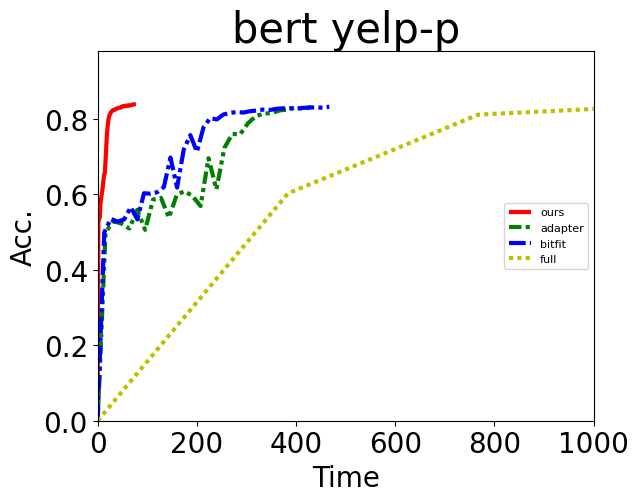

In [1]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np


dataset = "yelp-p"
model = "bert"

logging_file = {
    "ours":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/bert_yelp-p/fedFwd_bert_yelp-p_lr0.01_client_num_1000_numerical.log",
    "adapter":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/bert_yelp-p/fedsgd_bert_yelp-p_lr0.01_client_num_10_adapter.log",
    "bitfit":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/bert_yelp-p/fedsgd_bert_yelp-p_lr0.01_client_num_10_bitfit.log",
    "full":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/bert_yelp-p/fedsgd_bert_yelp-p_lr0.01_client_num_10_full.log"
}

train_time_dict = {"ours":1,"adapter":12,"bitfit":12,"full":20}
local_data_num_dict = {"agnews":15,"yahoo":18,"yelp-p":65}
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 

eval_frequence = 5 if dataset == "yahoo" else 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3

def round_to_time(round,eval_frequence,comm_time,method,local_data_num,adhoc=None):
    train_time = train_time_dict[method]
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "ours":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "ours":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list
    

for i,method in enumerate(logging_file):
    file = logging_file[method]
    local_data_num = local_data_num_dict[dataset]
    with open(file) as f:
        for line in f:
            if "Trainable" in line:
                param_num = int(line[line.rfind(":")+2:-2])
                print(f"param_num: {param_num}")
                break
        comm_time = param_num * 4 / comm_bandwidth
        acc = [0]
        if "," in file:
            adhoc = file.split("_")[-1].split(".")[0]
        else:
            adhoc = None
        for line in f:
            if "'acc':" in line:
                acc.append(float(line[line.rfind("'acc':")+7:line.rfind(",")]))
        print(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc))
        plt.plot(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc), acc, linestyle=linestyle[i], color=colors[i],label=method,linewidth=lw)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,1000)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8,loc=5)
plt.title(f"{model} {dataset}",fontsize=30)
plt.show()

param_num: 104450
[0, 9.011985778808594, 18.023971557617188, 27.03595733642578, 36.047943115234375, 45.05992889404297, 54.07191467285156, 63.083900451660156, 72.09588623046875, 81.10787200927734, 90.11985778808594, 99.13184356689453, 108.14382934570312, 117.15581512451172, 126.16780090332031, 135.1797866821289, 144.1917724609375, 153.2037582397461, 162.2157440185547, 171.22772979736328, 180.23971557617188, 189.25170135498047, 198.26368713378906, 207.27567291259766, 216.28765869140625, 225.29964447021484, 234.31163024902344, 243.32361602783203, 252.33560180664062, 261.3475875854492, 270.3595733642578, 279.3715591430664, 288.383544921875, 297.3955307006836, 306.4075164794922, 315.4195022583008, 324.4314880371094, 333.44347381591797, 342.45545959472656, 351.46744537353516, 360.47943115234375, 369.49141693115234, 378.50340270996094, 387.51538848876953, 396.5273742675781, 405.5393600463867, 414.5513458251953, 423.5633316040039, 432.5753173828125, 441.5873031616211, 450.5992889404297, 459.61

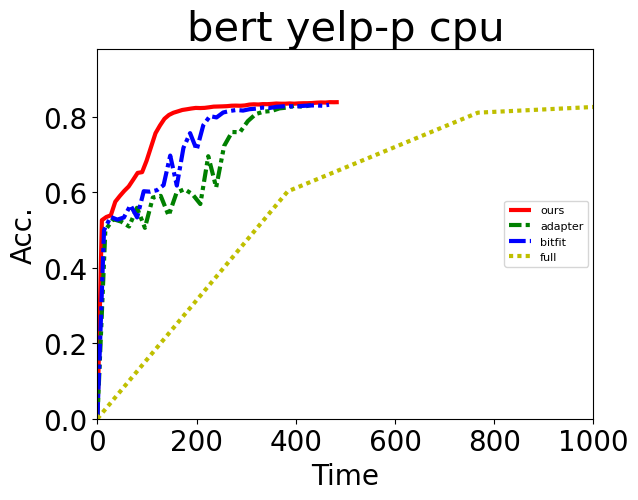

In [2]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np


dataset = "yelp-p"
model = "bert"

logging_file = {
    "ours":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/bert_yelp-p/fedFwd_bert_yelp-p_lr0.01_client_num_1000_numerical.log",
    "adapter":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/bert_yelp-p/fedsgd_bert_yelp-p_lr0.01_client_num_10_adapter.log",
    "bitfit":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/bert_yelp-p/fedsgd_bert_yelp-p_lr0.01_client_num_10_bitfit.log",
    "full":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/bert_yelp-p/fedsgd_bert_yelp-p_lr0.01_client_num_10_full.log"
}

train_time_dict = {"ours":8,"adapter":12,"bitfit":12,"full":20}
local_data_num_dict = {"agnews":15,"yahoo":18,"yelp-p":65}
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 

eval_frequence = 5 if dataset == "yahoo" else 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3

def round_to_time(round,eval_frequence,comm_time,method,local_data_num,adhoc=None):
    train_time = train_time_dict[method]
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "ours":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "ours":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list
    

for i,method in enumerate(logging_file):
    file = logging_file[method]
    local_data_num = local_data_num_dict[dataset]
    with open(file) as f:
        for line in f:
            if "Trainable" in line:
                param_num = int(line[line.rfind(":")+2:-2])
                print(f"param_num: {param_num}")
                break
        comm_time = param_num * 4 / comm_bandwidth
        acc = [0]
        if "," in file:
            adhoc = file.split("_")[-1].split(".")[0]
        else:
            adhoc = None
        for line in f:
            if "'acc':" in line:
                acc.append(float(line[line.rfind("'acc':")+7:line.rfind(",")]))
        print(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc))
        plt.plot(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc), acc, linestyle=linestyle[i], color=colors[i],label=method,linewidth=lw)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,1000)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8,loc=5)
plt.title(f"{model} {dataset} cpu",fontsize=30)
plt.show()